<a href="https://colab.research.google.com/github/AndrewsJascoro/DataAnalyts_Mintic_Talento_Tech/blob/main/SQL_and_SQLite_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import of libraries
import pandas as pd # python library for data manipulation
import sqlite3 # SQLite

# The input data.
path = "/content/database.sqlite"
database = path + 'database.sqlite'

# We create the connection with the DB and we will list the tables we have
conn = sqlite3.connect(database)
print ("Success connection")

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

Success connection


,type,name,tbl_name,rootpage,sql


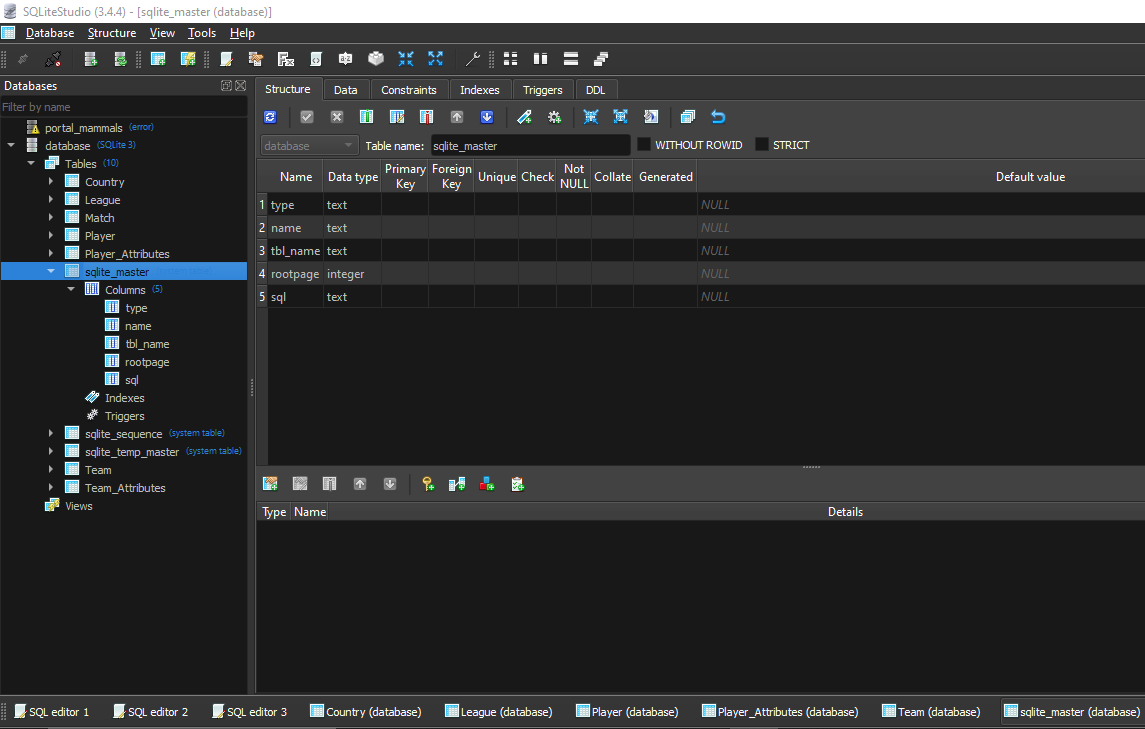

In [ ]:
 # Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt
from IPython.display import display

# Input data files.
# Connect to an SQLite database file.
conn = sqlite3.connect('/content/database.sqlite')

# Create a cursor object to execute SQL commands:
cursor = conn.cursor()

# Execute the SQL query to select all data from the 'Country' table:
cursor.execute('''Select * From Country; ''')

# Fetch all rows returned by the query into a DataFrame:
# countries = pd.DataFrame(cursor.fetchall(),
# columns=[i[0] for i in cursor.description])
countries = pd.DataFrame(cursor.fetchall(),
                         columns=[i[0] for i in cursor.description])
display(countries)

conn.commit()
conn.close()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [ ]:
# Imports
import pandas as pd
import sqlite3
from IPython.display import display

# Connect to the SQLite database file
conn = sqlite3.connect('/content/database.sqlite')

# Read data from the 'Country' table directly into a DataFrame
countries = pd.read_sql_query("SELECT * FROM Country", conn)

# Display the DataFrame
display(countries)

# Close the connection
conn.close()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


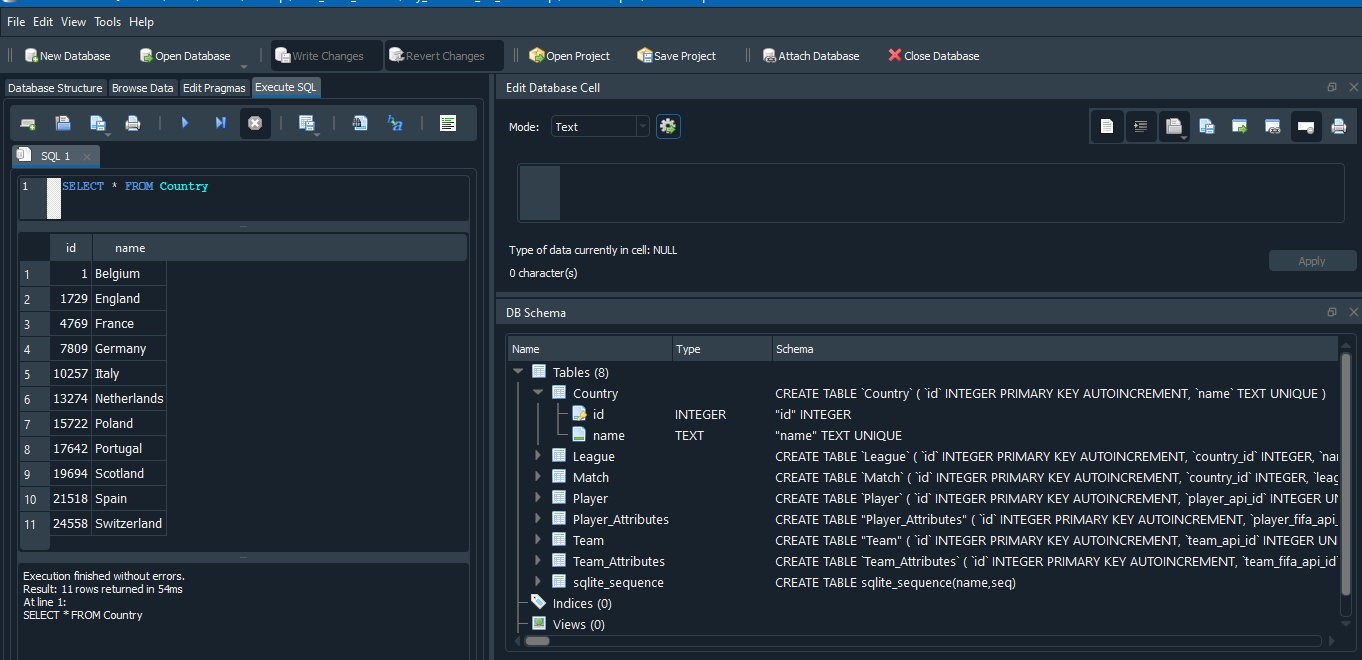

In [ ]:
# Import the necessary libraries
import sqlite3

# Connect to the SQLite database file
conn = sqlite3.connect('/content/database.sqlite')

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Execute a SQL query to count the occurrences of each preferred foot
cursor.execute("SELECT preferred_foot, COUNT(*) AS count FROM Player_Attributes GROUP BY preferred_foot")

# Fetch all rows returned by the query
results = cursor.fetchall()

# Display the results
for row in results:
    #display(f"{row[0]}-handed players: {row[1]}")
    print(f"{row[0]}-handed players: {row[1]}")

display(results)

# Close the connection
conn.close()

None-handed players: 836
left-handed players: 44733
right-handed players: 138409


[(None, 836), ('left', 44733), ('right', 138409)]

In [ ]:
import pandas as pd
import sqlite3
from IPython.display import display

# Connect to the SQLite database file
conn = sqlite3.connect('/content/database.sqlite')

# Read data from the 'Player_Attributes' table into a DataFrame
query = "SELECT preferred_foot FROM Player_Attributes"
player_data = pd.read_sql_query(query, conn)

# Count the occurrences of each preferred foot
foot_counts = player_data['preferred_foot'].value_counts()

# Display the results
for foot, count in foot_counts.items():
    print(f"{foot}-handed players: {count}", "\n")

display(foot_counts)
# Close the connection
conn.close()

right-handed players: 138409 

left-handed players: 44733 



right    138409
left      44733
Name: preferred_foot, dtype: int64

In [ ]:
# Count the occurrences of each preferred foot, including missing values
foot_counts = player_data['preferred_foot'].value_counts(dropna=False)
display(foot_counts)

right    138409
left      44733
None        836
Name: preferred_foot, dtype: int64

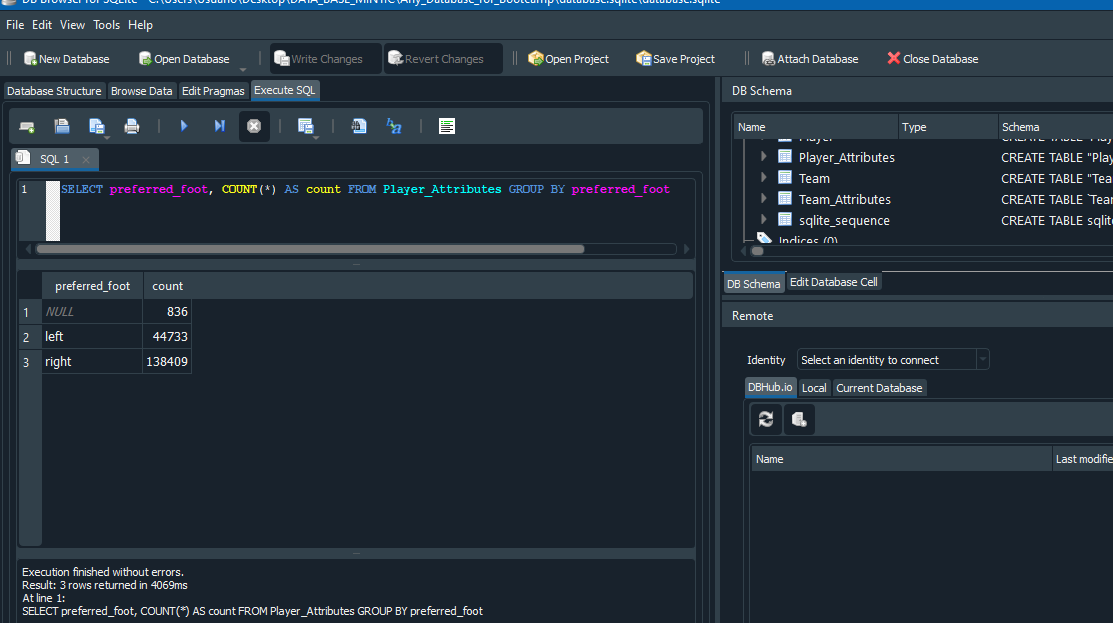

**Queremos saber cual es el nombre del jugador de soccer que más interceptaciones tiene?**

---
**We want to know the name of the soccer player who has the most interceptions?**
In two parts of code

In [6]:
import sqlite3
from IPython.display import display

# Connect to the SQLite database file
conn = sqlite3.connect("/content/database.sqlite")

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Execute the SQL query to find the distinct names of soccer players with the maximum interceptions
query = """
    SELECT DISTINCT p.player_name
    FROM Player p
    JOIN Player_Attributes pa ON p.player_api_id = pa.player_api_id
    WHERE pa.interceptions = (
        SELECT MAX(interceptions)
        FROM Player_Attributes
    )
    --LIMIT 5;
"""
cursor.execute(query)

# Fetch all rows returned by the query
results = cursor.fetchall()

# Display the results
print("Distinct names of soccer players with the maximum interceptions:")
for row in results:
    print(row[0])


# Close the connection
conn.close()

Distinct names of soccer players with the maximum interceptions:
Andrea Pirlo
Timmy Simons


In [1]:
import pandas as pd
import sqlite3
from IPython.display import display

# Connect to the SQLite database file
conn = sqlite3.connect("/content/database.sqlite")

# Read data from the 'Player_Attributes' table into a DataFrame
query = """
    SELECT DISTINCT p.player_name
    FROM Player p
    JOIN Player_Attributes pa ON p.player_api_id = pa.player_api_id
    WHERE pa.interceptions = (
        SELECT MAX(interceptions)
        FROM Player_Attributes
    )
    LIMIT 5;
"""
player_data = pd.read_sql_query(query, conn)

# Display the results
print("Distinct names of soccer players with the maximum interceptions:")
display(player_data)

# Close the connection
conn.close()

Distinct names of soccer players with the maximum interceptions:


,player_name
0,Andrea Pirlo
1,Timmy Simons


#Esto es la salida en Jupyter lab o jupyter Notebook:

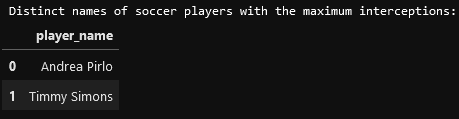






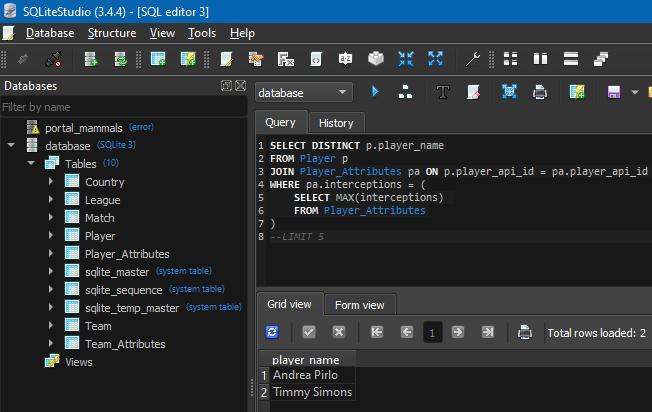

---
Second  picture:

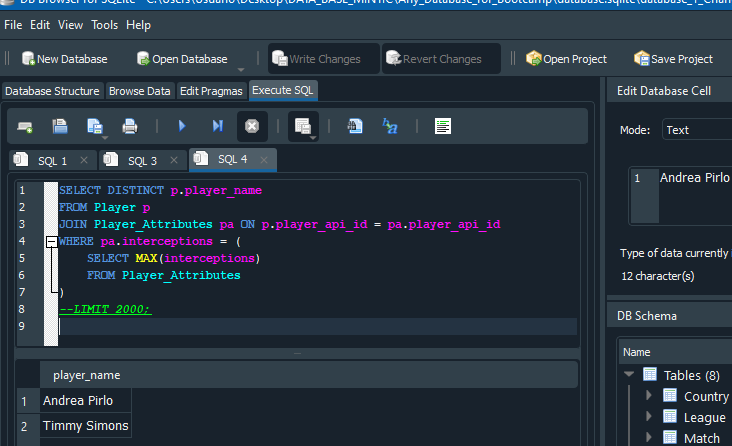


Realizamos un JOIN que combina la rows de la tabla 'League' con las rows de la tabla 'Country'en funcion de una columna relacionada, Se une "JOIN" basado en la columna 'country_id' en la tabla 'League' y la columna 'id' en la tabla 'Country'. Esto es que cada row de la tabla 'League' se encuentran la correspondiente row en la tabla 'Country' donde el 'id' coincide con el 'country_id.

---

This is the join operation. It combines rows from the League table with rows from the Country table based on a related column. Here, it's joining based on the country_id column in the League table and the id column in the Country table. This means that for each row in the League table, it finds the corresponding row in the Country table where the id matches the country_id.



In [5]:
import pandas as pd
import sqlite3
from IPython.display import display

# Connect to the SQLite database file
conn = sqlite3.connect("/content/database.sqlite")

leagues = pd.read_sql("""SELECT *
                        FROM League
                        JOIN Country ON Country.id = League.country_id;""", conn)
display(leagues)

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


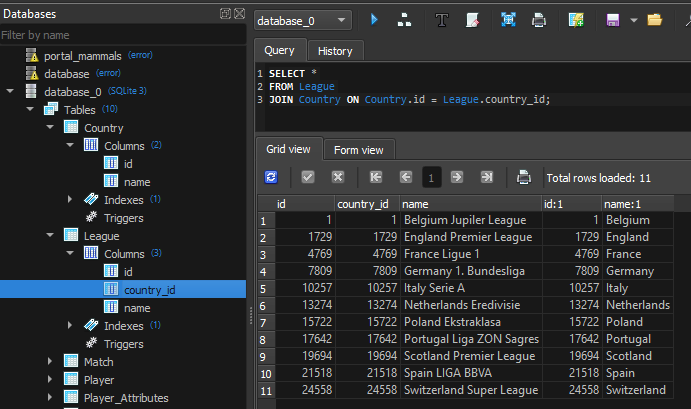

In [7]:
import pandas as pd
import sqlite3
from IPython.display import display

# Connect to the SQLite database file
conn = sqlite3.connect("/content/database.sqlite")

teams = pd.read_sql("""SELECT *
                        FROM Team
                        ORDER BY team_long_name
                        LIMIT 10;""", conn)
display(teams)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


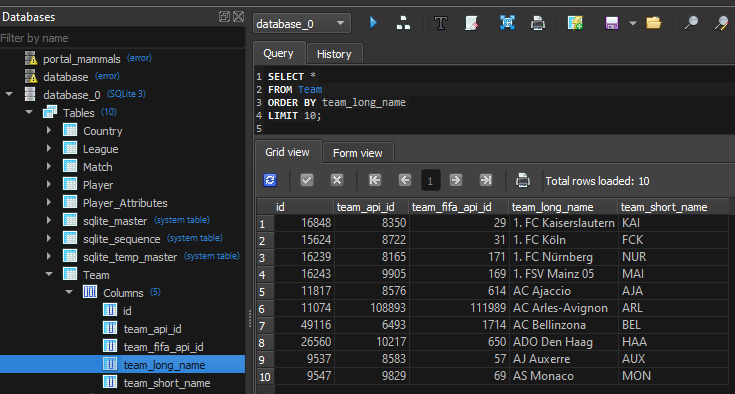

Con este query hicimos una lista de coincidencias.

In [8]:
import pandas as pd
import sqlite3
from IPython.display import display

# Connect to the SQLite database file
conn = sqlite3.connect("/content/database.sqlite")

detailed_matches = pd.read_sql("""SELECT Match.id,
                                        Country.name AS country_name,
                                        League.name AS league_name,
                                        season,
                                        stage,
                                        date,
                                        HT.team_long_name AS  home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal,
                                        away_team_goal
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'Spain'
                                ORDER by date
                                LIMIT 10;""", conn)
display(detailed_matches)

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


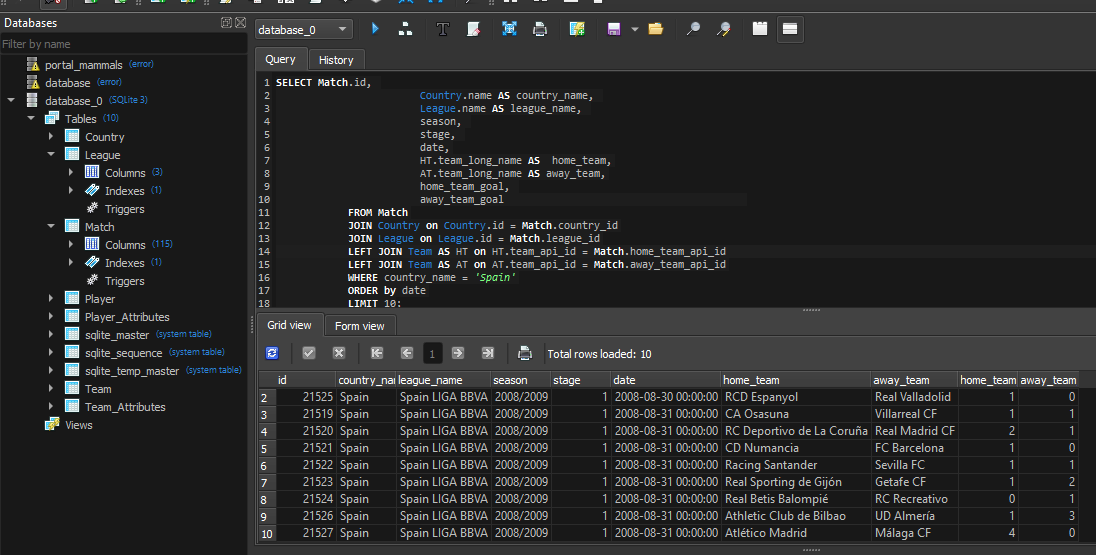

In [ ]:
conn.commit()
conn.close()

In [ ]:
# Import required libraries
import sqlite3
import pandas as pd
import zipfile
import os

# Path to the SQLite database file
db_file_path = "/content/database.sqlite.zip"

# Specify the extraction directory
extracted_folder_path = "/content/extracted_folder"

# Create the extraction directory if it doesn't exist
os.makedirs(extracted_folder_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(db_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Connect to the SQLite database
conn = sqlite3.connect(os.path.join(extracted_folder_path, 'database.sqlite'))

# Query data into DataFrame
df_Country = pd.read_sql_query("SELECT * FROM Country", conn)

# Display the DataFrame
print(df_Country.head())

# Close the database connection
conn.close()
